### Lecture 4: Homework

Today we gonna learn how to choose between ML models, based on data type. Your task would be to predict **the edibility of a mushroom** based on sample descriptions (binary classification problem)

The **tricky part here is that 95% of the features are of categorical type.**
<br>That's the one where we would **(usually)  prefer tree-based algorithms over linear methods**

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

More information can be found [here](https://www.kaggle.com/uciml/mushroom-classification/data)

Please find below correspondent [google form](https://docs.google.com/forms/d/e/1FAIpQLScmKfUApMlcD81u9UZxM7xG3vJiEJHrPrG-3b0i_jyPEDijgQ/viewform) to submit your answers

In [33]:
# library import
import pandas as pd
import numpy as np
from os.path import join as pjoin
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 100

# preprocessing / validation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
)
# ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# metrics
from sklearn.metrics import classification_report, f1_score

In [2]:
# read data
DATA_DIR = '../../data/mushrooms/'
df_train = pd.read_csv(pjoin(DATA_DIR, '4-mushrooms-train.csv'), engine='c')
df_test = pd.read_csv(pjoin(DATA_DIR, '4-mushrooms-test.csv'), engine='c')
print(df_train.shape, df_test.shape)

(6499, 23) (1625, 22)


In [3]:
# let's see what data looks like
df_train.head()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,convex,scaly,brown,bruises,pungent,free,close,narrow,white,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,brown,scattered,urban
1,1,flat,fibrous,gray,bruises,none,free,close,broad,brown,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,brown,several,woods
2,0,flat,smooth,brown,no,none,attached,close,broad,orange,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,brown,several,leaves
3,1,convex,fibrous,gray,bruises,none,free,close,broad,brown,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,black,solitary,woods
4,0,knobbed,smooth,brown,no,foul,free,close,narrow,buff,tapering,missing,silky,smooth,pink,pink,partial,white,one,evanescent,white,several,paths


In [4]:
df_test.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,convex,scaly,brown,bruises,almond,free,close,broad,pink,enlarging,rooted,smooth,scaly,white,white,partial,white,one,pendant,brown,solitary,paths
1,flat,fibrous,brown,bruises,none,free,close,broad,white,tapering,bulbous,smooth,smooth,gray,white,partial,white,one,pendant,brown,several,woods
2,flat,smooth,brown,bruises,pungent,free,close,narrow,white,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,several,grasses
3,convex,smooth,white,bruises,foul,free,close,broad,white,tapering,bulbous,smooth,fibrous,white,white,partial,white,one,pendant,chocolate,scattered,urban
4,conical,scaly,white,bruises,none,free,crowded,narrow,white,enlarging,bulbous,smooth,smooth,white,white,partial,white,one,pendant,white,clustered,leaves


In [35]:
# for convenient calculations, let us merge train with test
df = pd.concat([df_train, df_test], axis=0)
# add column for filtering train/test
df['is_train'] = True
df.loc[df.target.isnull(), 'is_train'] = False
# check shapes
print(df.shape)
# check labels
df.is_train.value_counts()

(8124, 24)


True     6499
False    1625
Name: is_train, dtype: int64

### Task 1. Which feature has the highest amount of unique values? (joint dataset)


In [6]:
most_diversive = df.describe(include=['object']).loc['unique'].sort_values(ascending = False).keys()[0]
print(most_diversive)

gill_color


### Task 2
**As a preparation, one would spend up to 15-30 minutes on exploratory data analysis (EDA)** - make sure you understand how features are distributed in train/test, what they look like, are they ordinal/binary/categorical before moving further
<br>While doing it, please answer the questions

In [7]:
import pandas as pd
import pandas_profiling

In [8]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="statistic.html")

## EDA (exploratory data analysis)

In [42]:
cc_unique = df.cap_color.unique()

poisonous_cc = [df[(df.target == 0) & (df.cap_color == cc)].shape[0] for cc in cc_unique] #Poisonous color cap list
edible_cc = [df[(df.target == 1) & (df.cap_color == cc)].shape[0] for cc in cc_unique]    #Edible color cap list

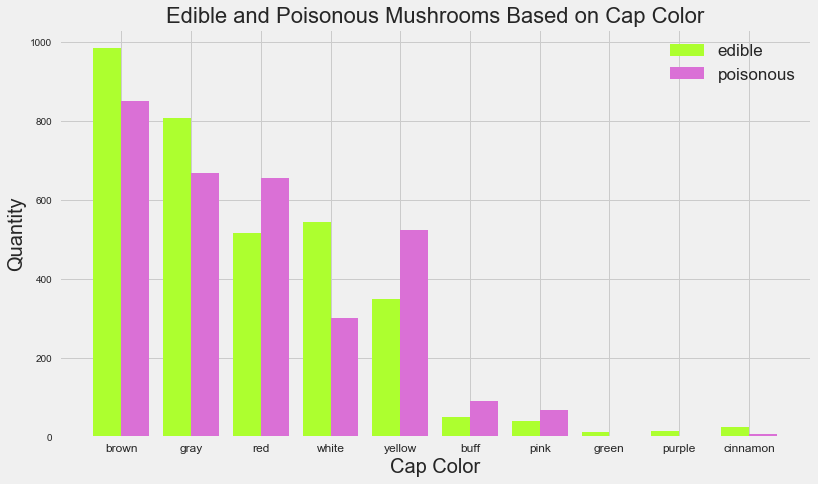

[984, 806, 515, 544, 350, 49, 39, 11, 14, 24]
[849, 668, 655, 300, 524, 91, 69, 0, 0, 7]


In [47]:
width = 0.40
ind = np.arange(10)
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(cc_unique,
                  fontsize = 12)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
# autolabel(edible_bars, 10)
# autolabel(poison_bars, 10)
plt.show()
print(edible_cc)
print(poisonous_cc)

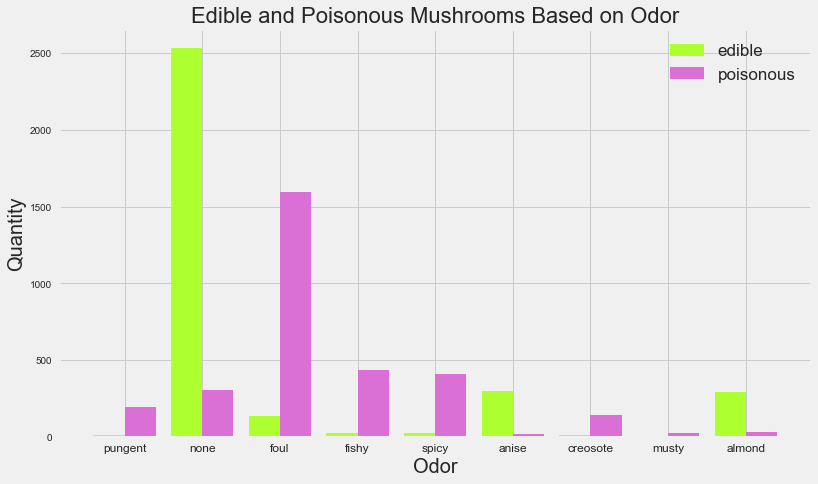

[14, 2534, 134, 23, 25, 301, 10, 4, 291]
[196, 306, 1593, 438, 412, 21, 144, 25, 28]


In [54]:
od_unique = df.odor.unique()
poisonous_od = [df[(df.target == 0) & (df.odor == od)].shape[0] for od in od_unique] 
edible_od = [df[(df.target == 1) & (df.odor == od)].shape[0] for od in od_unique]    

        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
ind = np.arange(len(edible_od))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)

ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2)  #Positioning on the x axis
ax.set_xticklabels(od_unique,
                  fontsize = 12)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
# autolabel(edible_bars, 10)
# autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)

### Double plot chart pie for population

In [55]:
pop_unique = df.population.unique()
poisonous_pop = [df[(df.target == 0) & (df.population == p)].shape[0] for p in pop_unique] 
edible_pop = [df[(df.target == 1) & (df.population == p)].shape[0] for p in pop_unique]    


In [58]:
populations = df['population'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)

[4040, 1712, 1248, 400, 384, 340]


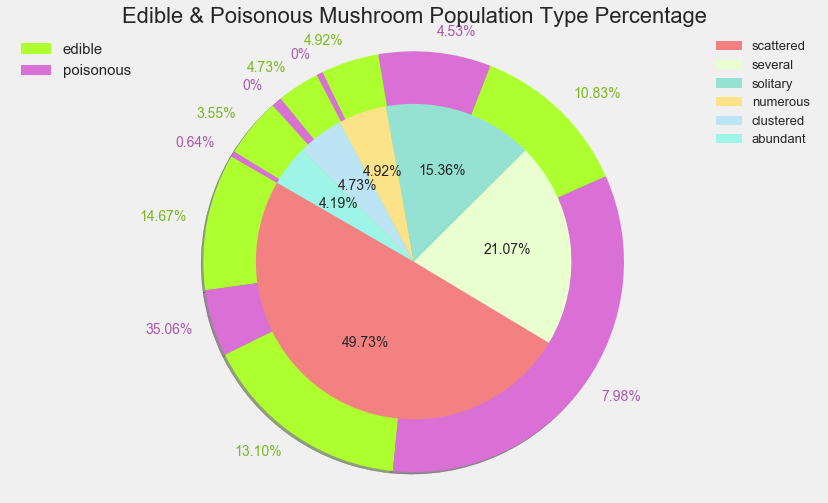

In [63]:
combine_ed_poi = []
for i in range(0,len(edible_pop)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])
#print(edible_pop) print(poisonous_pop) print(combine_ed_poi)

colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice

#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Population Type Percentage', fontsize=22)
percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
                  '3.55%','0.64%'] #Percetanges for edible and poisonous

#===First pie===
patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, labels= percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') #Color % labels with dark green
    else:
        texts1[i].set_color('#AE59AB') # " " dark purple
    texts1[i].set_fontsize(14)         #make labels bigger
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(pop_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, pop_unique, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

### Mushroom Habitat


In [71]:
hab_unique = df.habitat.unique()
poisonous_hab = [df[(df.target == 0) & (df.habitat == h)].shape[0] for h in hab_unique] 
edible_hab = [df[(df.target == 1) & (df.habitat == h)].shape[0] for h in hab_unique]    


In [72]:
combine_ed_poi = []
for i in range(0,len(edible_hab)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_hab[i])
    combine_ed_poi.append(poisonous_hab[i])
print(edible_hab) 
print(poisonous_hab) 
print(combine_ed_poi)

[80, 1455, 209, 160, 1096, 136, 200]
[212, 1041, 442, 760, 653, 9, 46]
[80, 212, 1455, 1041, 209, 442, 160, 760, 1096, 653, 136, 9, 200, 46]


In [74]:
habitats = df['habitat'].value_counts()
hab_size = habitats.values.tolist() #Provides numerical values
hab_types = habitats.axes[0].tolist() #Converts index labels object to list

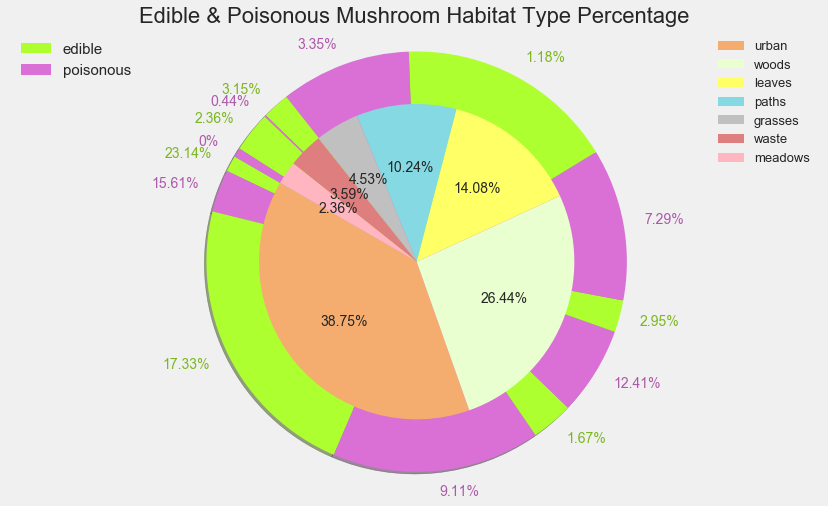

In [75]:
#DOUBLE PIE CHART
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0,0.5)  # explode 1st slice


#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Habitat Type Percentage', fontsize=22)
percentages_e_p = ['23.14%','15.61%','17.33%', '9.11%','1.67%','12.41%','2.95%','7.29%','1.18%','3.35%',
                  '3.15%','0.44%','2.36%','0%'] #Percetanges for edible and poisonous
#===First pie===
patches1, texts1= plt.pie(combine_ed_poi,radius = 2, labels=percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') #Color % labels with dark green
    else:
        texts1[i].set_color('#AE59AB') # " " dark purple
    texts1[i].set_fontsize(14)         #make labels bigger
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(hab_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, hab_unique, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

#### 2.1 Are there any features, obviously redundant to train on? If yes - what are they and why it's better to remove them?

In [9]:
print(df.shape)
# your code/hardcoded list goes here
# ---------------------------------------------------------------
redundant_columns = [
    'veil_type'
]
# ---------------------------------------------------------------
# lets drop these columns from joint dataset
df = df.drop(redundant_columns, axis=1, errors='ignore')
print(df.shape)

(8124, 24)
(8124, 23)


####  2.2 How many features (excluding target variable and train/test indexing columns) are:
- categorical (more than 2 unique values, no explicit ordering)
- ordinal (more than 2 unique values, explicit ordering)
- binary (2 unique values, doesn't matter whether it has ordering or is "yes/no" styled) 

In [10]:
ordinal_cols = sorted([
    'ring_number'
    
])
binary_cols = sorted([
    'bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape'
])
categorical_cols = sorted([
    'gill_color', 'cap_color', 'stalk_color_below_ring',
    'stalk_color_above_ring', 'spore_print_color', 'odor', 'habitat',
    'population', 'cap_shape', 'stalk_root', 'ring_type', 'cap_surface',
    'veil_color', 'stalk_surface_below_ring', 'stalk_surface_above_ring',
])
# ---------------------------------------------------------------
print('categorical: {}\nordinal: {}\nbinary: {}'.format(
    len(categorical_cols), len(ordinal_cols), len(binary_cols)))

categorical: 15
ordinal: 1
binary: 5


In [11]:
# To be used in training, data must be properly encoded
from collections import defaultdict

# function to encode categorical data


def __encode_categorical(df_list, cat_cols):
    # initialize placeholder
    d = defaultdict(LabelEncoder)
    # fit and encode train/test,
    codes = pd.concat(
        [df[cat_cols] for df in df_list],
        axis=0
    ).fillna('').apply(
        lambda x: d[x.name].fit(x)
    ),
    # transform encodings to train/test etc
    for df in df_list:
        df[cat_cols] = df[cat_cols].fillna('').apply(
            lambda x: d[x.name].transform(x))


# label encode data (categorical + binary)
__encode_categorical(df_list=[df], cat_cols=categorical_cols+binary_cols)
# make sure you encode the only ordinal column in correct order
df[ordinal_cols[0]] = df[ordinal_cols[0]].map({'none': 0, 'one': 1, 'two': 2})

# define useful feature columns to be used for training
# (union of all columns discussed above)
columns_to_use = ordinal_cols + binary_cols + categorical_cols

In [12]:
df.head()

,bruises,cap_color,cap_shape,cap_surface,gill_attachment,gill_color,gill_size,gill_spacing,habitat,odor,population,ring_number,ring_type,spore_print_color,stalk_color_above_ring,stalk_color_below_ring,stalk_root,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,target,veil_color,is_train
0,0,0,2,2,1,10,1,0,4,7,3,1,4,1,7,7,2,0,3,3,0.0,2,True
1,0,3,3,0,1,1,0,0,6,6,4,1,4,1,7,7,0,1,3,3,1.0,2,True
2,1,0,3,3,0,6,0,0,1,6,4,1,4,1,4,4,3,0,3,3,0.0,1,True
3,0,3,2,0,1,1,0,0,6,6,5,1,4,0,7,7,0,1,3,3,1.0,2,True
4,1,0,4,3,1,2,1,0,3,4,4,1,0,7,5,5,3,1,2,3,0.0,2,True


### Task 3. Prepare cross-validation strategy and perform comparison of 2 baseline models (linear vs tree-based)

### =====================================================
#### Briefly about Validation / Cross-Validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but **would fail to predict anything useful on yet-unseen data. This situation is called overfitting**. 
<br>To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set ```X_test, y_test```. 
<br>Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

When evaluating different settings (“hyperparameters”) for estimators, **there is still a risk of overfitting on the test set** because the parameters can be tweaked until the estimator performs optimally. 
<br>This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. 
<br>To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, **we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.**

A solution to this problem is a procedure called **cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV**. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

- A model is trained using k-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data 
<br>(i.e., it is used as a test set to compute a performance measure such as accuracy).
        
<img src="https://hsto.org/files/b1d/706/e6c/b1d706e6c9df49c297b6152878a2d03f.png"/ style="width:75%">

The performance measure reported by k-fold cross-validation **is then the average of the values computed in the loop**. 
<br>This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small.


Some classification problems can **exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples**. 
<br>In such cases it is recommended to use **stratified sampling** as implemented in sklearn's StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.

More details about different cross-validation strategies, implemented in sklearn, can be found [here](http://scikit-learn.org/stable/modules/cross_validation.html)
### =====================================================

Prepare KFold with 5 splits, stratified by target variable, shuffled, with fixed random_state = 42
<br>**Don't forget to filter by column 'is_train'!**
<br>Fit models on subset of features: [columns_to_use]

In [14]:
from os import cpu_count

n_jobs = max(cpu_count()-1, 1)

# cross-validation iterator
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# xtrain, ytrain, DataFrame-like
xtrain = df[df.is_train].drop(labels=['target', 'is_train'], axis=1)
ytrain = df[df.is_train].target
# ---------------------------------------------------------------

# create Decision Tree with default params, max_depth=4, random_state=42
dt = DecisionTreeClassifier(
    max_depth=4, 
    random_state=42
)

scores_dt = cross_val_score(
    estimator=dt,
    X=xtrain, 
    y=ytrain, 
    scoring='f1', 
    cv=kf, # cross-validation strategy
    n_jobs=n_jobs
).mean()
print('DT scoring: {:.2f}'.format(scores_dt))

# create Logistic Regression with default params, random_state=42
lr = LogisticRegression(
    random_state=42
)

# estimate its f1-score with cross-validation
scores_lr = cross_val_score(
    estimator=lr,
    X=xtrain,
    y=ytrain,
    scoring='f1',
    cv=kf,
    n_jobs=n_jobs
).mean()
print('LR scoring: {:.2f}'.format(scores_lr))

DT scoring: 0.92
LR scoring: 0.89


Why is a score of Linear Regression lower than correspondent one of DT?
1. Is everything OK with the data format for linear models? (revision of 2 previous lectures). 
1. If not, what else you should do to use the data appropriately for linear models?
1. Why didn't point 1. affect Decision Tree performance?

### Task 4. Now it's time to do some hyperparam tuning
Perform suitable hyperparam tuning using created above cross-validation strategy
<br>Main parameters to perform grid-search for:
- max_depth (1,2,...None)
- min_samples_leaf (1,2,...)
- criterion (gini, entropy)
- weight (none, balanced)
- max_features (sqrt(features), 50%, 75%, all of them, ...)
- other params available, see documentation

So - use your fantasy for filling-in abovementioned lists

You should receive **a gain of 0.01 in f1-score or higher**
<br>(current benchmark = +0.0268 gain)

In [29]:
%%time
# create base model (DT, random state = 42)
estimator = DecisionTreeClassifier(
    random_state = 42
)

feature_num = xtrain.columns.size
params = {
    'max_depth':[10, 15, 20, 25, 30],
    'min_samples_leaf':[3, 5, 6, 7],
    'min_samples_split':[5, 7, 10, 15],
    'max_features':[None, "sqrt", "log2", feature_num//2],
    'criterion': ['gini', 'entropy'],
}

gs = GridSearchCV(
    estimator=estimator,  # base model
    param_grid=params,  # params grid to search within
    cv=kf,  # cross-validation strategy
    error_score=1,  # warnings only
    scoring='f1',  # f1-score
    # thread count, the higher count - the faster
    n_jobs=n_jobs,
    verbose=2,  # messages about performed actions
)

gs.fit(
    X=xtrain, 
    y=ytrain, 
)

best_score = gs.best_score_
best_dt = gs.best_estimator_
# check gain in f1-score
print('f1-score best: {:.4f}, +{:.4f} better than baseline'.format(
    best_score, (best_score - scores_dt))
)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=6, min_samp

[Parallel(n_jobs=3)]: Done  64 tasks      | elapsed:    3.4s


[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=7, total=   0.1s
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10 
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=None, min_sample

[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, total=   0.0s
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10 
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_sample

[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, total=   0.1s
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10 
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, total=   0.0s
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_sampl

[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, total=   0.0s
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10 
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_sample

[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=7 
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=10, total=   0.0s
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=10 
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=7, min_s

[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=10 
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=10, t

[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=7 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=10, total=   0.1s


[Parallel(n_jobs=3)]: Done 306 tasks      | elapsed:   12.5s


[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.0s
[CV]  criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=10, min_samples_leaf=7, min_samp

[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=5, mi

[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV] criterion=gini, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=None, min_samples_leaf=7, m

[CV]  criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10 
[CV] criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV]  criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=sqrt, min_sam

[CV] criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV]  criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=7, min_samples_split=15 
[CV] criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=7, min_samples_split=15, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=7, m

[CV]  criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10 
[CV] criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV]  criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=15 
[CV] criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, m

[CV] criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=15, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV]  criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=15 
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=5, min_samples_split=10, total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.2s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=5, min_samples_split=15 
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=6, min_sam

[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV]  criterion=gini, max_depth=15, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV] criterion=gini, max_depth=15, max_features=10, min_samples_leaf=7, min_sa

[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=5, m

[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV] criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.0s


[Parallel(n_jobs=3)]: Done 712 tasks      | elapsed:   32.0s


[CV] criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV]  criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=sqrt, min_samples_

[CV] criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV]  criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samp

[CV]  criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV]  criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samp

[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.0s
[CV]  criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_l

[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=3, min_sam

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=5, min_samples_split=15 
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV]  c

[CV]  criterion=gini, max_depth=20, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf

[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.2s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.2s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.2s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_lea

[CV]  criterion=gini, max_depth=25, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.2s
[CV] criterion=gini, max_depth=25, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=7 
[CV] criterion=gini, max_depth=25, max_features=sqrt, min_samples_le

[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_le

[CV] criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=3, min_sampl

[CV] criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.0s
[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_le

[CV]  criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_

[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=gini, max_depth=25, max_features=10, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=25, max_features=10, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=25, max_features=10, min_samples_leaf=6, min_samples_sp

[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5 


[Parallel(n_jobs=3)]: Done 1278 tasks      | elapsed:  1.0min


[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=7 
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf

[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.2s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.2s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV] criterion=gini, max_depth=30, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_leaf=6, min_samples_split=7, total=   0.2s
[CV]  criterion=gini, max_depth=30, max_features=None, min_samples_le

[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.0s
[CV] criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf

[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.0s
[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=7 
[CV] criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=sqrt, m

[CV]  criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=7 
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples

[CV]  criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=log2, min_samples_leaf

[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=7 
[CV] criterion=gini, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_spl

[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=7 
[CV] criterion=gini, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=gini, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=gini, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_spli

[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=7 
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_

[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=None, 

[CV]  criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.2s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7 
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt,

[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_f

[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=15, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=log2

[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15 
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=entropy, max_depth=10, ma

[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=log2, min_sampl

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=10, max_features=10, 

[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV]  criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_feature

[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=15, max_features

[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=10, total=   0.2s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=15, max_feature

[Parallel(n_jobs=3)]: Done 2008 tasks      | elapsed:  1.8min


[CV] criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, total=   0.2s
[CV]  criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=15 
[CV] criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_featur

[CV]  criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=15 
[CV] criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, total=   0.0s
[CV]  criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=1

[CV] criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=10, total=   0.0s
[CV]  criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=10 
[CV] criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_featur

[CV]  criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=10 
[CV] criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=15 
[CV]  criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_feature

[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=3, min_samples_split=10 
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=3, min_samples_split=7 
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=3, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=3, min_samples_split=10 
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=3, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=3, min_samp

[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=6, min_samples_split=10, total=   0.1s
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=6, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=15, max_features=10, min_samples_leaf=6, min_samples_split=10 
[CV] criterion=entropy, max_depth=15, max_features=10, m

[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=7, total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10, total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=20, max_features=N

[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=10 
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=10, total=   0.2s
[CV]  criterion=entropy, max_depth=20, max_features=None, min_samples_leaf=6, min_samples_split=10, total=   0.2s
[CV] criterion=entropy, max_depth=20, m

[CV]  criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=7 
[CV] criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV]  criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=20, max

[CV]  criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7 
[CV] criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV]  criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, total=   0.0s
[CV]  criterion=entropy, max_depth=20, max_

[CV]  criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=7 
[CV] criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=log2, 

[CV]  criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.0s
[CV] criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7 
[CV] criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7, total=   0.0s
[CV]  criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_f

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=7 
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=3, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_sa

[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=7, total=   0.1s
[CV]  criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=10, min_samples_leaf=6, min_samples_split=7 
[CV] criterion=entropy, max_depth=20, max_features=10, min_s

[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=7 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_f

[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.2s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=5, min_samples_split=15, total=   0.2s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=6, min_samples_split=7 
[CV]  criterion=entropy, max_depth=25, max_features=None

[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=7, min_samples_split=15, total=   0.2s
[CV] criterion=entropy, max_depth=25, max_features=None, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=sqrt

[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=sqr

[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=15, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=15 
[CV] criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV]  criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=25,

[CV] criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV]  criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=5, min_samples_split=15 
[CV] criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV]  criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=25

[CV] criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=7, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV]  criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=7, min_samples_split=15 
[CV] criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=

[CV]  criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=5, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV]  criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=5, min_samples_split=15 
[CV] criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=5, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=10

[CV] criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=7, min_samples_split=10 
[CV]  criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV]  criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=7, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=7, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5 
[CV] criterion=entropy, max_depth=25, max_features=10, min_samples_leaf=7, min_samples_split=15 
[CV]  criterion=entropy, max_depth=25, max_features=10, min_sample

[Parallel(n_jobs=3)]: Done 2898 tasks      | elapsed:  2.6min


[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=5, total=   0.2s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=7 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=7, total=   0.2s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=7 
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=7 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=30, max_features=None,

[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=7, min_samples_split=5, total=   0.2s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=7, min_samples_split=7 
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=7, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=7, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=7, min_samples_split=7 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=7, min_samples_split=7, total=   0.1s
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=7, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=7, min_samples_split=7 
[CV]  criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=7, min_samples_split=5, total=   0.2s
[CV] criterion=entropy, max_depth=30, max_f

[CV] criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=7 
[CV]  criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=7 
[CV]  criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, total=   0.0s
[CV]  criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_f

[CV] criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, total=   0.0s
[CV]  criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=5 
[CV] criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, total=   0.0s
[CV] criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=7 
[CV] criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=7 
[CV]  criterion=entropy, max_depth=30, max_features=sqrt,

[CV]  criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=15, total=   0.0s
[CV]  criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5 
[CV] criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5 
[CV] criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, total=   0.0s
[CV]  criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5 
[CV] criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=7 
[CV]  criterion=entropy, max_depth=30, max_features=log2,

[CV]  criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=7, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=15 
[CV] criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=7, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=15, total=   0.1s
[CV]  criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=7, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=7, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=7, min_samples_split=5 
[CV] criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=7, min_samples_split=7 
[CV]  criterion=entropy, max_depth=30, max_features=log

[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=15 
[CV]  criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=15, total=   0.1s
[CV]  criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=5, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=5 
[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=10, min_samples_leaf

[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=15 
[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=7, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=15, total=   0.1s
[CV]  criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=15 
[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=7, min_samples_split=5 
[CV]  criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=7, min_samples_split=5, total=   0.1s
[CV]  criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=6, min_samples_split=15, total=   0.1s
[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf=7, min_samples_split=5 
[CV] criterion=entropy, max_depth=30, max_features=10, min_samples_leaf

[Parallel(n_jobs=3)]: Done 3200 out of 3200 | elapsed:  2.9min finished


f1-score best: 0.9275, +0.0105 better than baseline
CPU times: user 44.6 s, sys: 6.8 s, total: 51.4 s
Wall time: 2min 56s


In [16]:
best_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [20]:
# check performance on holdout dataset, unseen before (filter 'is_train' == False)

# appropriate df_test data subset from 'df' dataframe
xtest = df[~df.is_train].drop(labels=['target', 'is_train'], axis=1)
dt.fit(xtrain, ytrain)

y_true = pd.read_csv(pjoin(DATA_DIR, '4-mushrooms-y_test.csv'))
y_pred_baseline = dt.predict(xtest)

print('Base on train:   {:.4f}\nBase on holdout: {:.4f}\ndiff: {:.4f}'.format(
    scores_dt, 
    f1_score(y_true, y_pred_baseline),
    scores_dt - f1_score(y_true, y_pred_baseline)
))

y_pred_best = best_dt.predict(xtest)

print('\nBest on train:   {:.4f}\nBest on holdout: {:.4f}\ndiff: {:.4f}'.format(
    best_score, 
    f1_score(y_true, y_pred_best),
    best_score - f1_score(y_true, y_pred_best)
))

Base on train:   0.9170
Base on holdout: 0.9050
diff: 0.0120

Best on train:   0.9278
Best on holdout: 0.9205
diff: 0.0074


Now you can see that 
<br>**absolute values of f1-score is higher and distance between train|holdout is lower** <br>for **best model** in comparison to **baseline**

**Bonus question**:

Consider two possibilities:
- (a) you have trained **one best** (on cross-validation) Decision Tree
- (b) you randomly choose 25 subsets of 70% of training data, fits "overfitted" (max_depth=None) Decision Trees on it - each of them performs slightly worse than Tree in (a), and then average predicted results over all 25 models (overfitted trees)

**Which one of them would most likely give the best results on hold-out dataset? What makes you think that way?**